<a href="https://colab.research.google.com/github/MLiserb/Algorithmic_Trading_Machine_Learning/blob/main/List_final_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

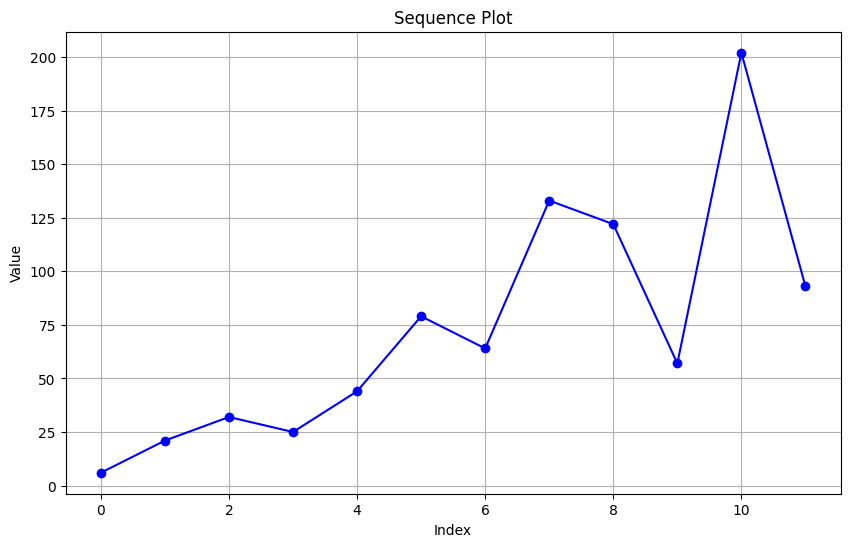

In [2]:
import matplotlib.pyplot as plt

# Sequence of numbers
sequence = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Plotting the sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence, marker='o', linestyle='-', color='b')
plt.title('Sequence Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

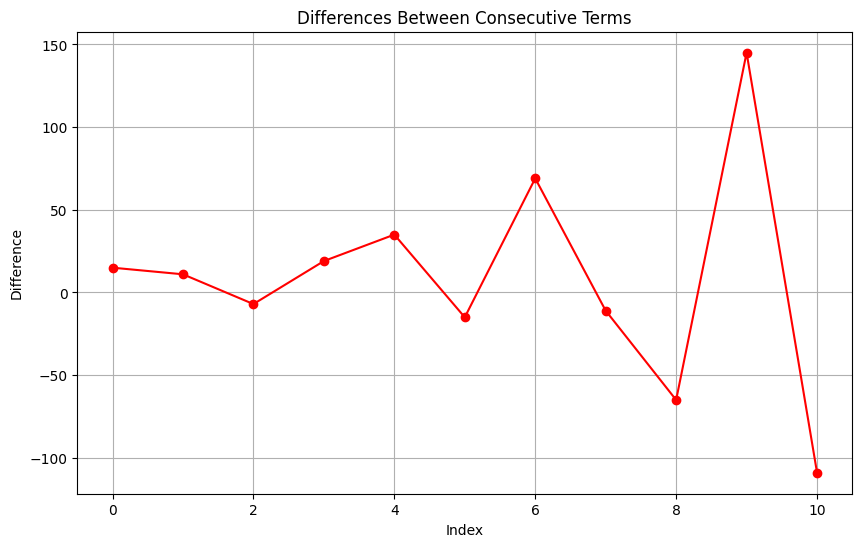

In [3]:
# Calculating differences
differences = [sequence[i+1] - sequence[i] for i in range(len(sequence)-1)]

# Plotting the differences
plt.figure(figsize=(10, 6))
plt.plot(differences, marker='o', linestyle='-', color='r')
plt.title('Differences Between Consecutive Terms')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

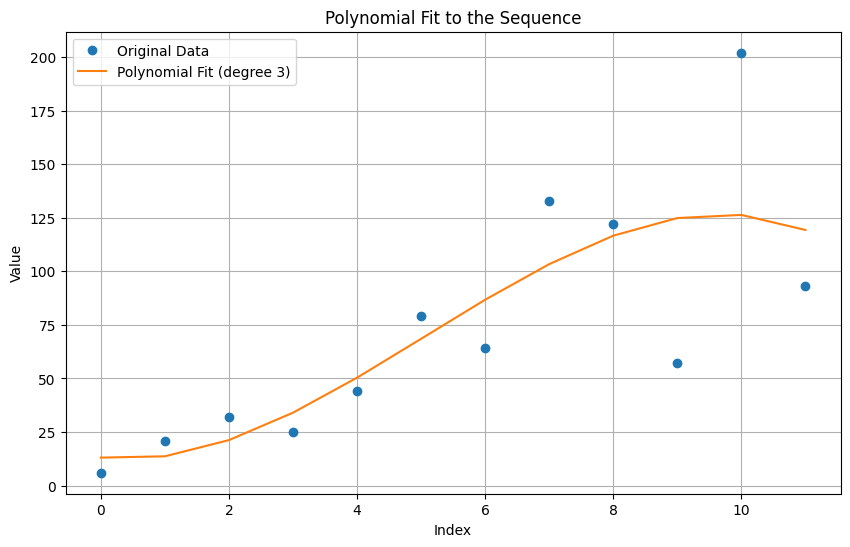

In [4]:
import numpy as np

# Fitting a polynomial of degree 3 (cubic) as an example
x = np.arange(len(sequence))
coefficients = np.polyfit(x, sequence, 3)
polynomial = np.poly1d(coefficients)

# Plotting the polynomial fit
plt.figure(figsize=(10, 6))
plt.plot(x, sequence, 'o', label='Original Data')
plt.plot(x, polynomial(x), '-', label='Polynomial Fit (degree 3)')
plt.title('Polynomial Fit to the Sequence')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

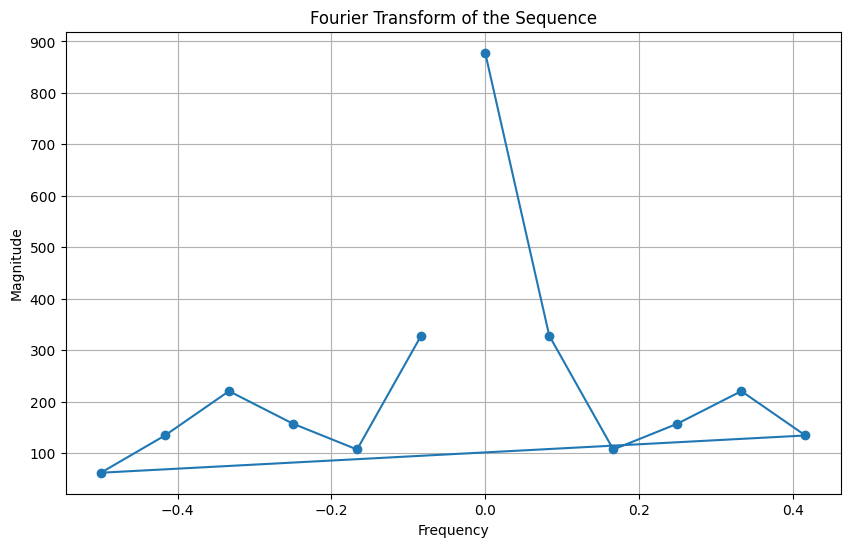

In [5]:
from scipy.fft import fft

# Performing Fourier Transform
fft_values = fft(sequence)
frequencies = np.fft.fftfreq(len(sequence))

# Plotting the magnitude of the Fourier coefficients
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_values), marker='o')
plt.title('Fourier Transform of the Sequence')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

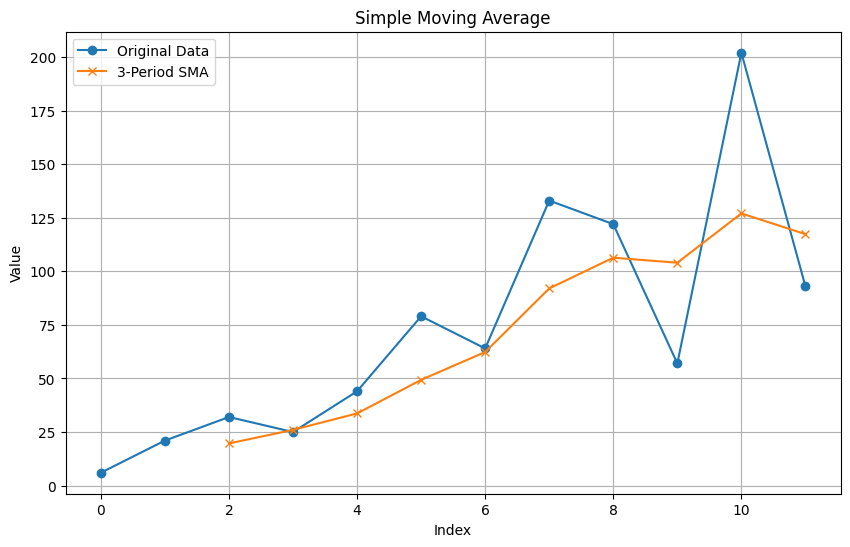

In [6]:
def moving_average(data, window_size):
    return [sum(data[i:i+window_size])/window_size for i in range(len(data)-window_size+1)]

# Calculate a 3-period moving average
sma = moving_average(sequence, 3)

# Plotting the moving average
plt.figure(figsize=(10, 6))
plt.plot(sequence, label='Original Data', marker='o')
plt.plot(range(2, 2+len(sma)), sma, label='3-Period SMA', linestyle='-', marker='x')
plt.title('Simple Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

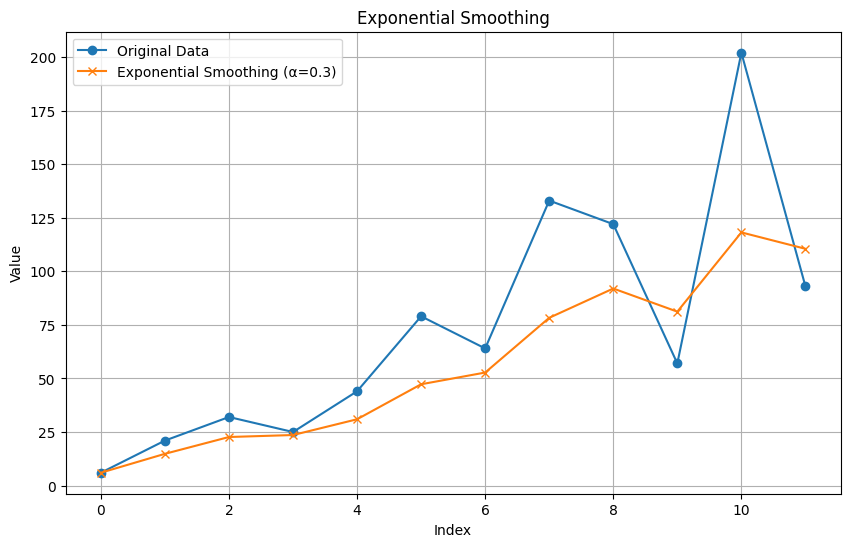

In [7]:
import pandas as pd

# Converting the sequence to a pandas Series
series = pd.Series(sequence)

# Applying exponential smoothing
exp_smooth = series.ewm(alpha=0.3).mean()

# Plotting the exponential smoothing
plt.figure(figsize=(10, 6))
plt.plot(sequence, label='Original Data', marker='o')
plt.plot(exp_smooth, label='Exponential Smoothing (α=0.3)', linestyle='-', marker='x')
plt.title('Exponential Smoothing')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

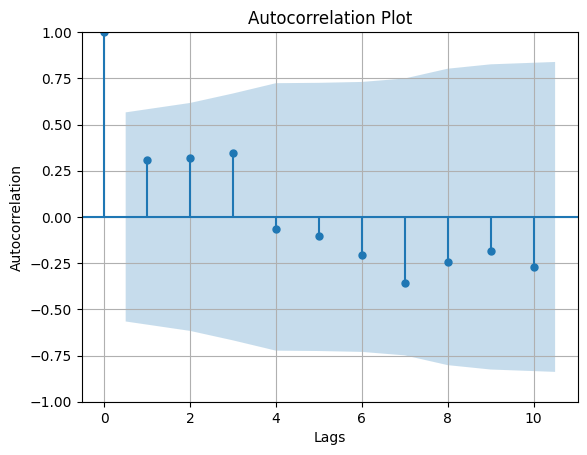

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(sequence, lags=10)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


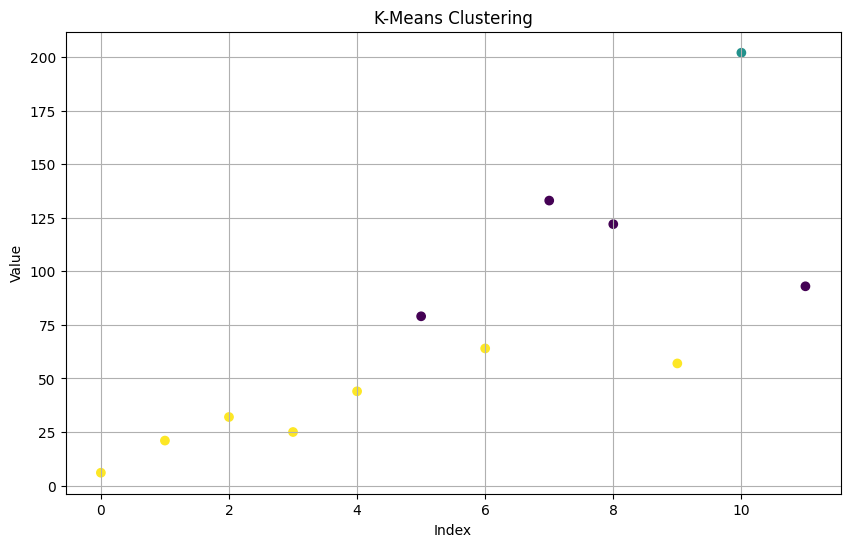

In [9]:
from sklearn.cluster import KMeans

# Reshaping the sequence for clustering
data = np.array(sequence).reshape(-1, 1)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Getting cluster labels
labels = kmeans.labels_

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sequence)), sequence, c=labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

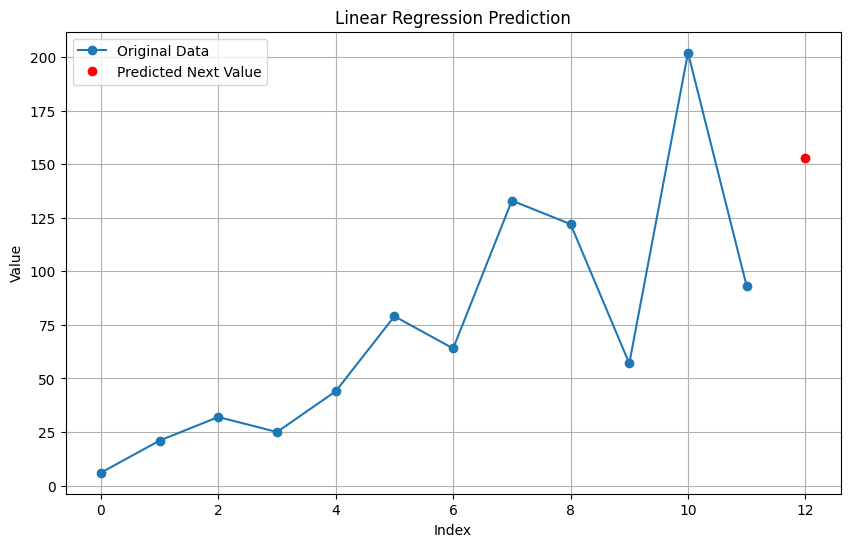

Predicted next value: 152.66666666666663


In [10]:
from sklearn.linear_model import LinearRegression

# Preparing data for linear regression
X = np.array(range(len(sequence))).reshape(-1, 1)
y = np.array(sequence)

# Fitting the model
model = LinearRegression().fit(X, y)

# Predicting the next value
next_index = len(sequence)
next_value = model.predict([[next_index]])

# Plotting the sequence with the prediction
plt.figure(figsize=(10, 6))
plt.plot(sequence, label='Original Data', marker='o')
plt.plot(next_index, next_value, 'ro', label='Predicted Next Value')
plt.title('Linear Regression Prediction')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print(f'Predicted next value: {next_value[0]}')

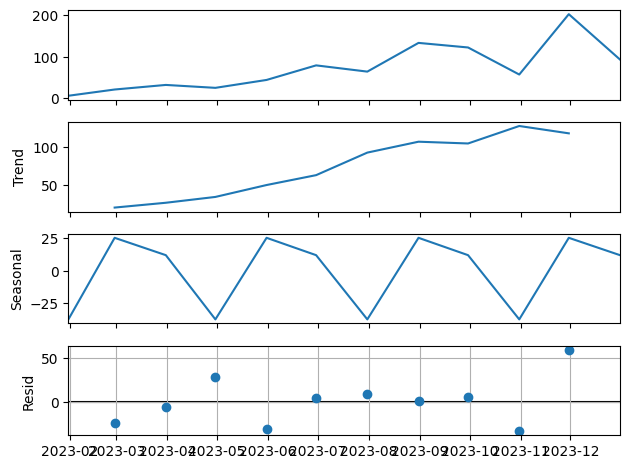

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting sequence to a time series
ts = pd.Series(sequence, index=pd.date_range(start='2023-01-01', periods=len(sequence), freq='M'))

# Performing seasonal decomposition
result = seasonal_decompose(ts, model='additive', period=3)

# Plotting the decomposition
result.plot()
plt.grid(True)
plt.show()

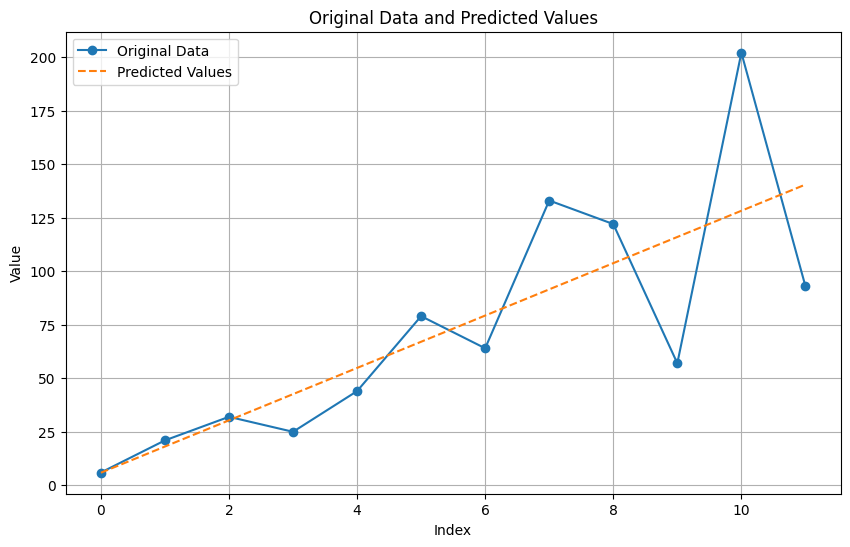

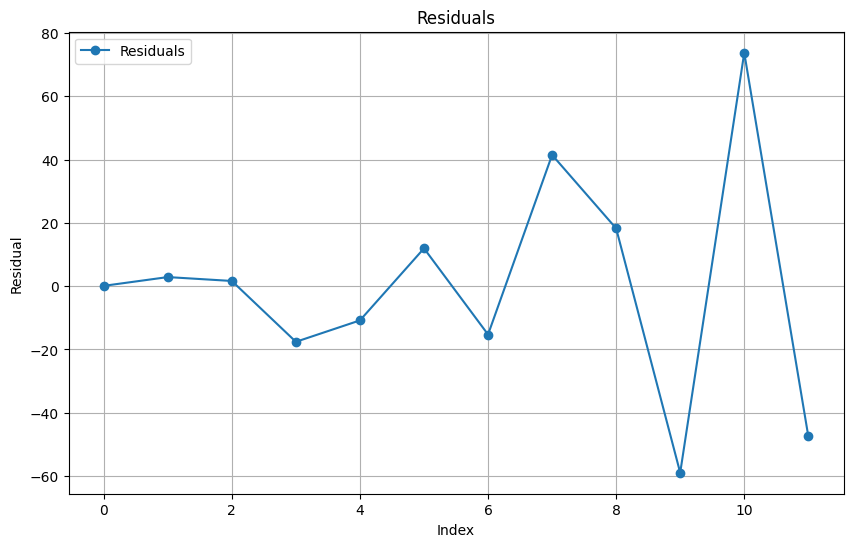

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sequence of numbers
sequence = [6, 21, 32, 25, 44, 79, 64, 133, 122, 57, 202, 93]

# Preparing data for linear regression
X = np.array(range(len(sequence))).reshape(-1, 1)
y = np.array(sequence)

# Fitting the model
model = LinearRegression().fit(X, y)

# Predicting the values
predicted = model.predict(X)

# Calculating residuals
residuals = y - predicted

# Plotting the original data, predicted values, and residuals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Data', marker='o')
plt.plot(predicted, label='Predicted Values', linestyle='--')
plt.title('Original Data and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

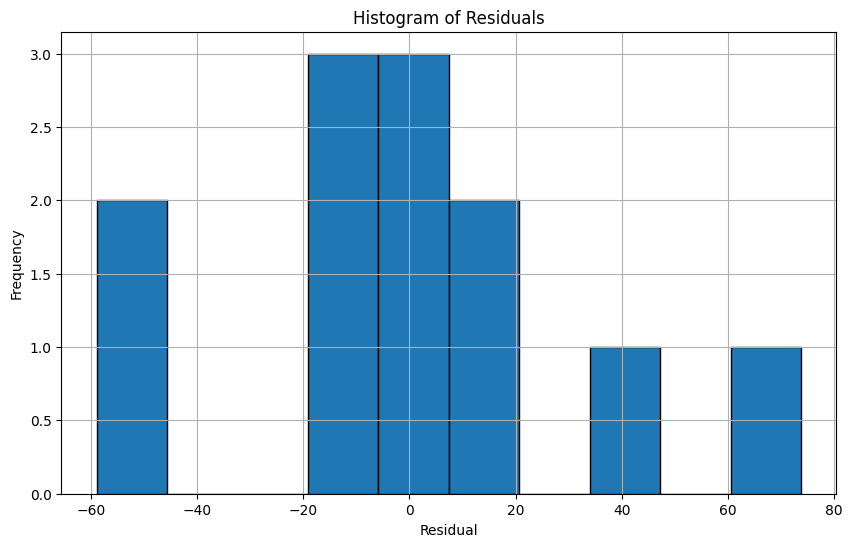

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

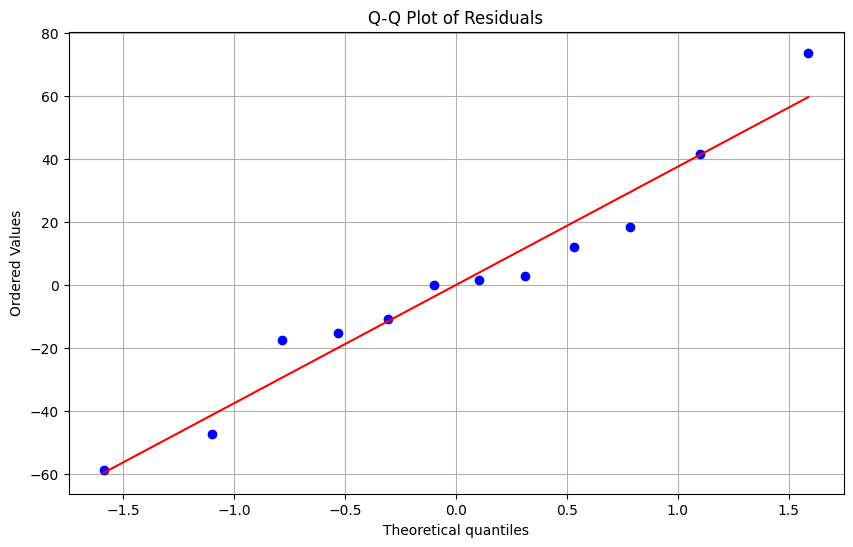

In [14]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

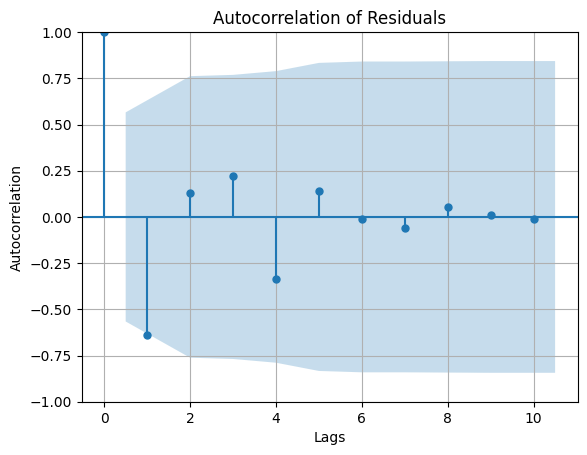

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=10)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

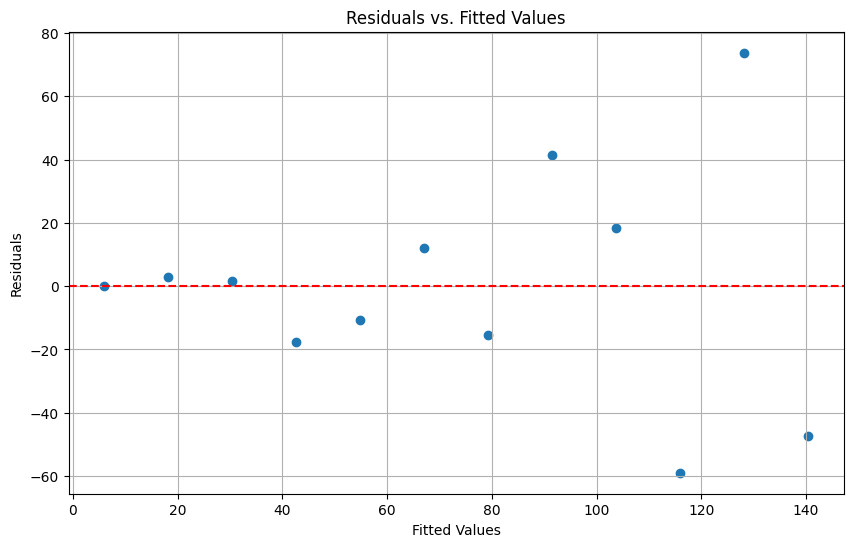

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

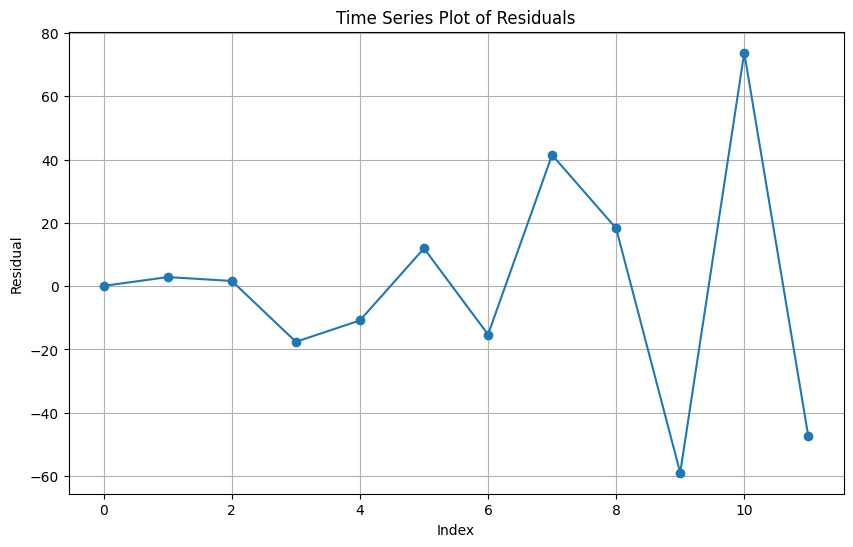

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-')
plt.title('Time Series Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -54.772
Date:                Tue, 21 May 2024   AIC                            117.544
Time:                        05:49:00   BIC                            119.484
Sample:                             0   HQIC                           116.826
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5248      1.899      0.803      0.422      -2.197       5.247
ar.L1         -0.2242      0.284     -0.789      0.430      -0.781       0.332
ma.L1         -0.9990     89.725     -0.011      0.9

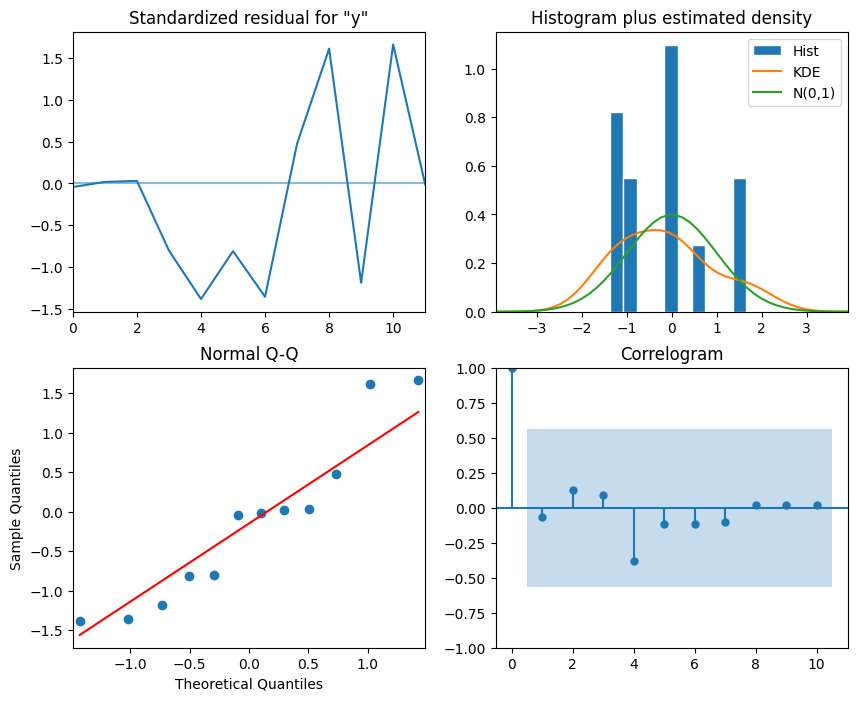

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting an ARIMA model to the residuals
model = ARIMA(residuals, order=(1, 0, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plotting the residuals of the ARIMA model
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, predicted)
rmse = mean_squared_error(y, predicted, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 25.01709401709401
Root Mean Squared Error (RMSE): 34.20776140250835


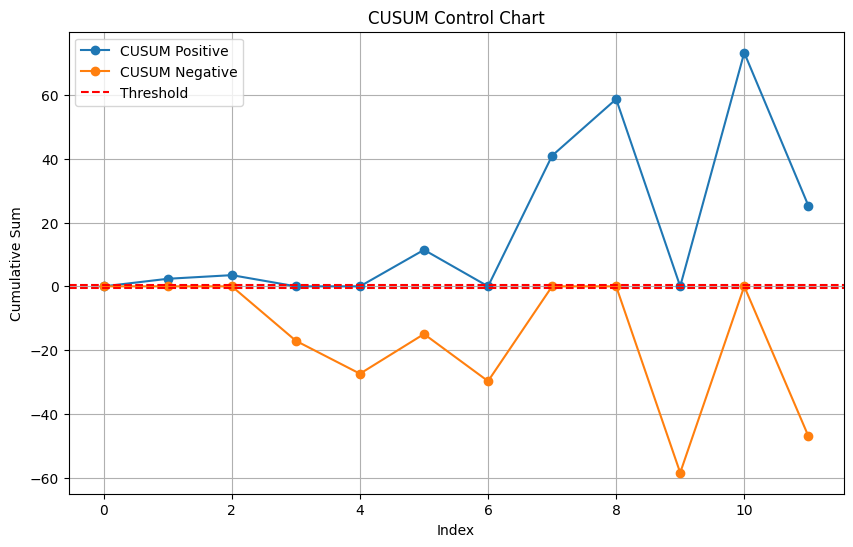

In [20]:
def calculate_cusum(residuals, threshold):
    S_positive = np.zeros(len(residuals))
    S_negative = np.zeros(len(residuals))

    for i in range(1, len(residuals)):
        S_positive[i] = max(0, S_positive[i-1] + residuals[i] - threshold)
        S_negative[i] = min(0, S_negative[i-1] + residuals[i] + threshold)

    return S_positive, S_negative

# Set a threshold
threshold = 0.5

S_positive, S_negative = calculate_cusum(residuals, threshold)

plt.figure(figsize=(10, 6))
plt.plot(S_positive, label='CUSUM Positive', marker='o')
plt.plot(S_negative, label='CUSUM Negative', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.title('CUSUM Control Chart')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.show()

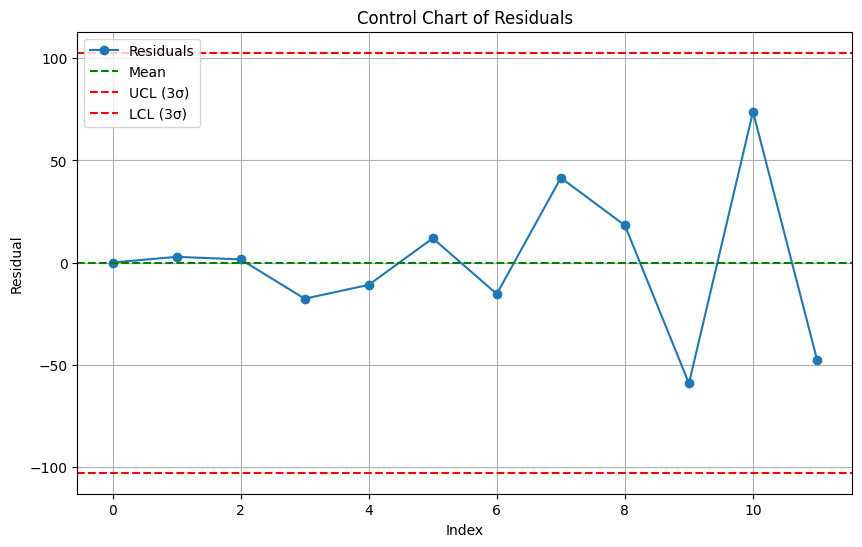

In [21]:
import pandas as pd

# Control limits (mean ± 3 standard deviations)
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

UCL = mean_residuals + 3 * std_residuals
LCL = mean_residuals - 3 * std_residuals

plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-', label='Residuals')
plt.axhline(y=mean_residuals, color='green', linestyle='--', label='Mean')
plt.axhline(y=UCL, color='red', linestyle='--', label='UCL (3σ)')
plt.axhline(y=LCL, color='red', linestyle='--', label='LCL (3σ)')
plt.title('Control Chart of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

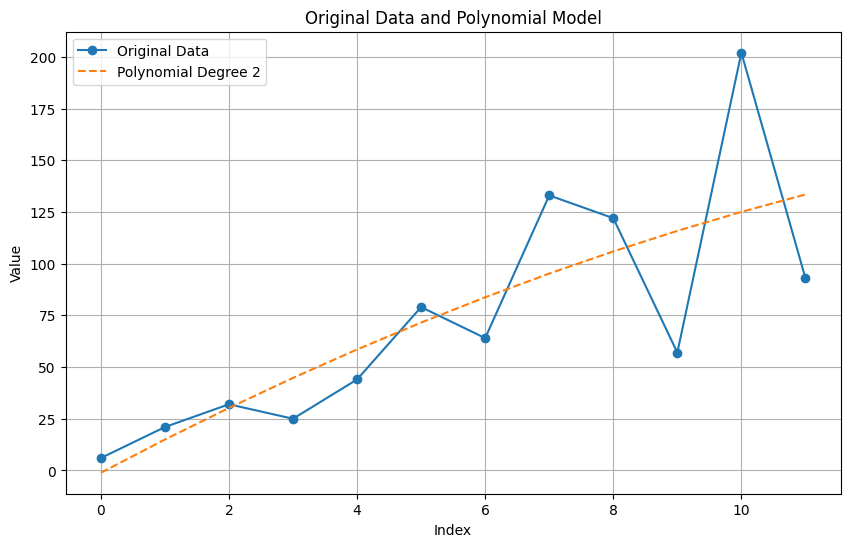

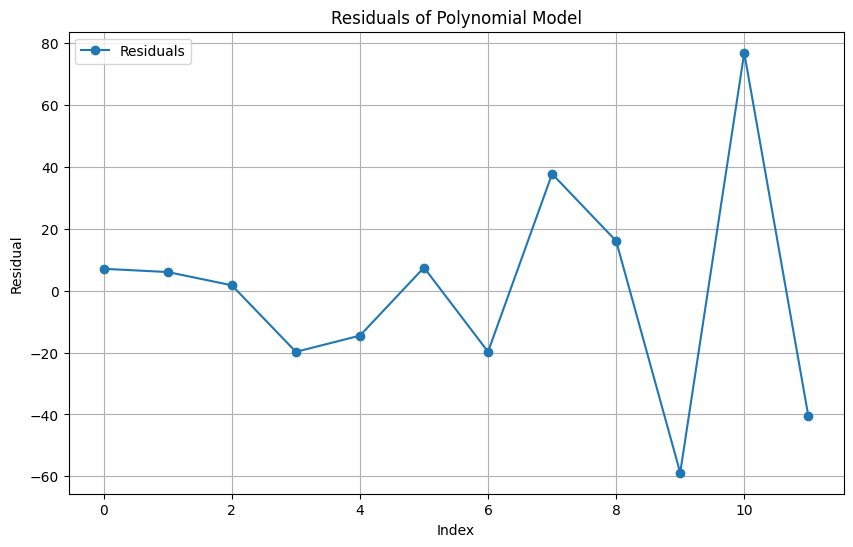

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression (degree 2)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Predicting and calculating residuals
poly_predicted = poly_model.predict(X)
poly_residuals = y - poly_predicted

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Data', marker='o')
plt.plot(poly_predicted, label=f'Polynomial Degree {degree}', linestyle='--')
plt.title('Original Data and Polynomial Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(poly_residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of Polynomial Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

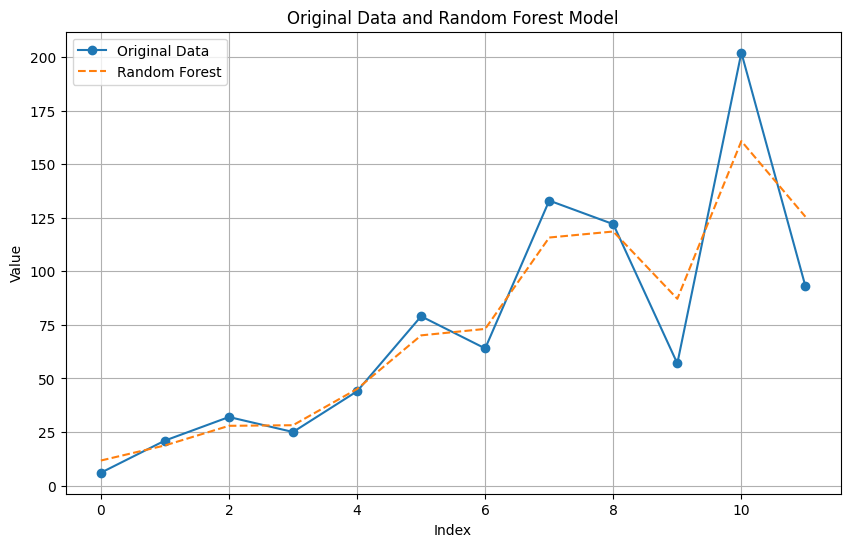

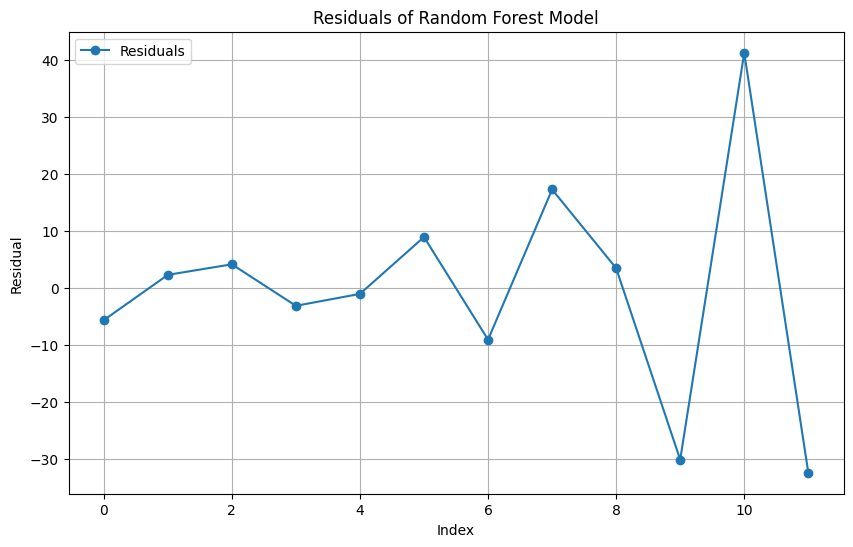

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Predicting and calculating residuals
rf_predicted = rf_model.predict(X)
rf_residuals = y - rf_predicted

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Data', marker='o')
plt.plot(rf_predicted, label='Random Forest', linestyle='--')
plt.title('Original Data and Random Forest Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(rf_residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of Random Forest Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

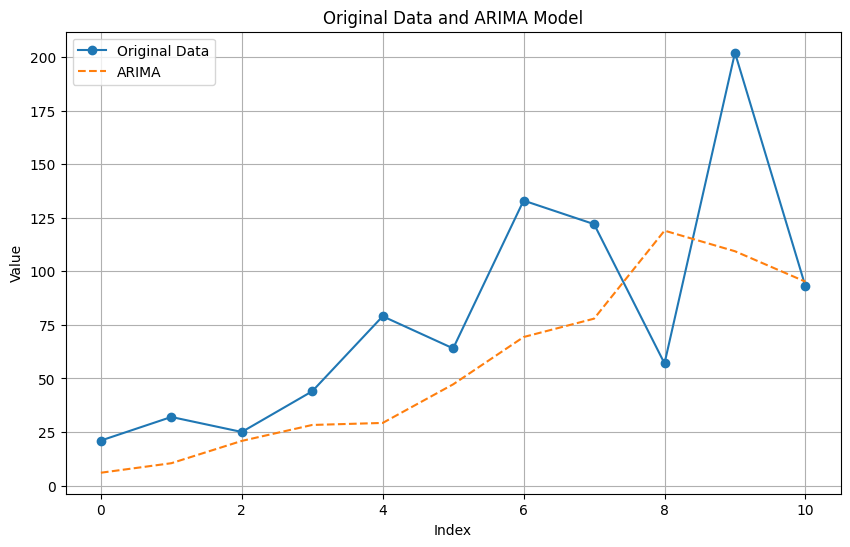

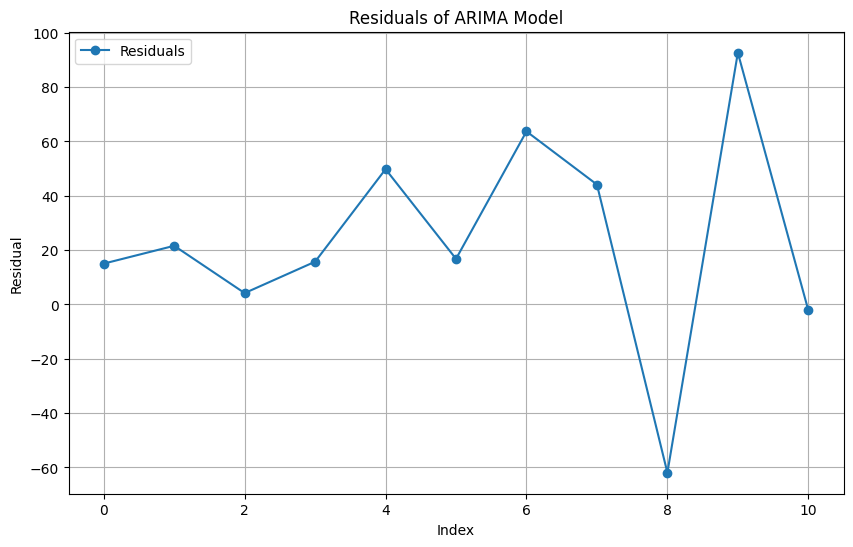

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(y, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Predict and calculate residuals
arima_predicted = arima_fit.predict(start=1, end=len(y)-1)
arima_residuals = y[1:] - arima_predicted

plt.figure(figsize=(10, 6))
plt.plot(y[1:], label='Original Data', marker='o')
plt.plot(arima_predicted, label='ARIMA', linestyle='--')
plt.title('Original Data and ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(arima_residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

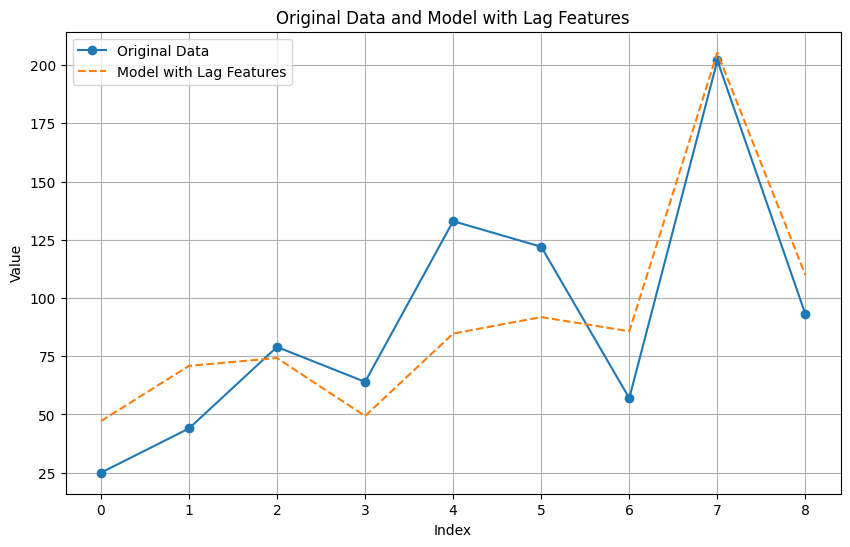

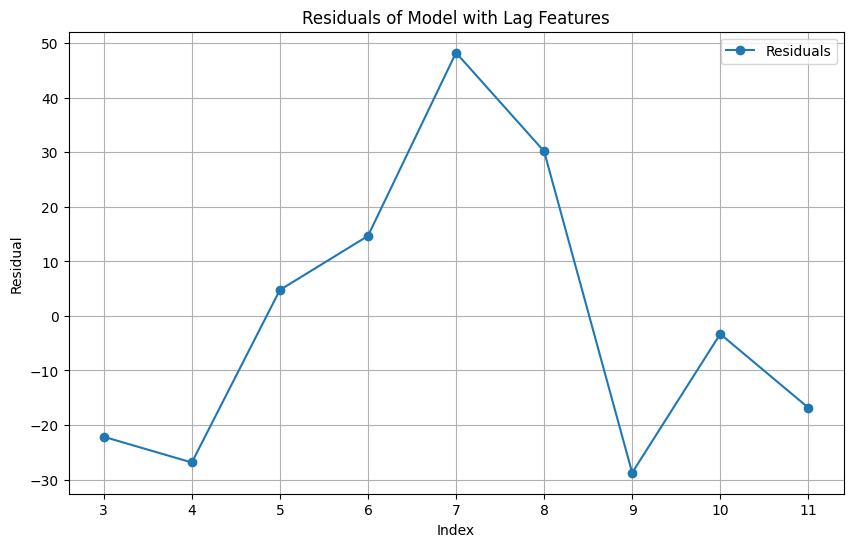

In [25]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'Value': y})

# Create lag features
for lag in range(1, 4):
    df[f'Lag_{lag}'] = df['Value'].shift(lag)

# Drop missing values
df.dropna(inplace=True)

# Prepare data
X_lag = df.drop('Value', axis=1)
y_lag = df['Value']

# Fit a model with lag features
model_with_lag = LinearRegression().fit(X_lag, y_lag)

# Predict and calculate residuals
pred_with_lag = model_with_lag.predict(X_lag)
residuals_with_lag = y_lag - pred_with_lag

plt.figure(figsize=(10, 6))
plt.plot(y_lag.values, label='Original Data', marker='o')
plt.plot(pred_with_lag, label='Model with Lag Features', linestyle='--')
plt.title('Original Data and Model with Lag Features')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(residuals_with_lag, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of Model with Lag Features')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

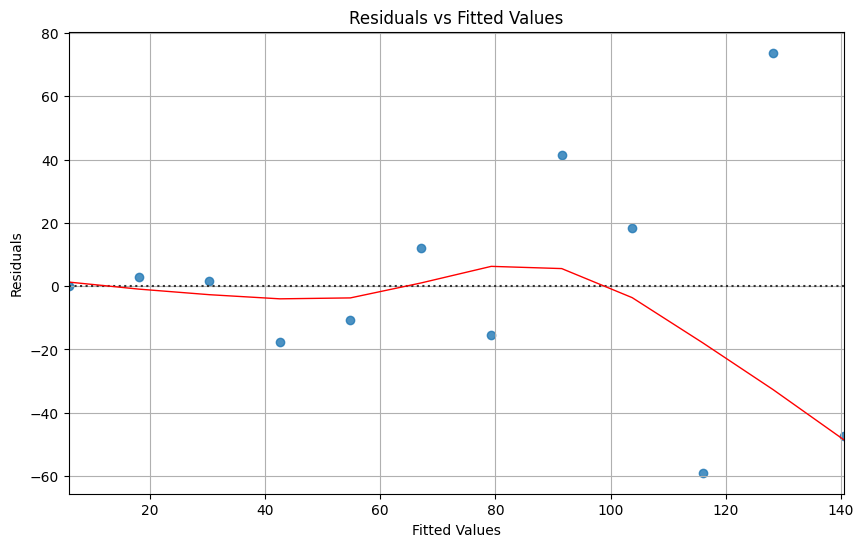

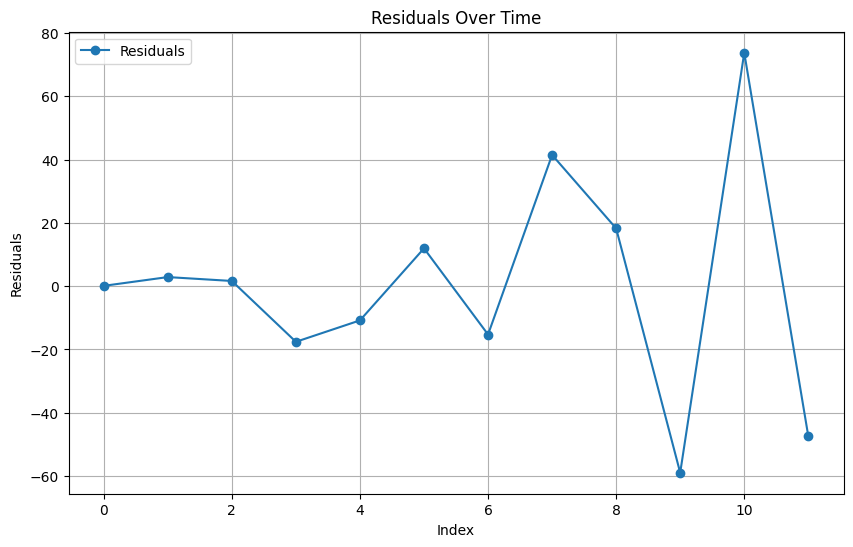

In [26]:
import seaborn as sns

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.residplot(x=predicted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot residuals vs time
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals Over Time')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

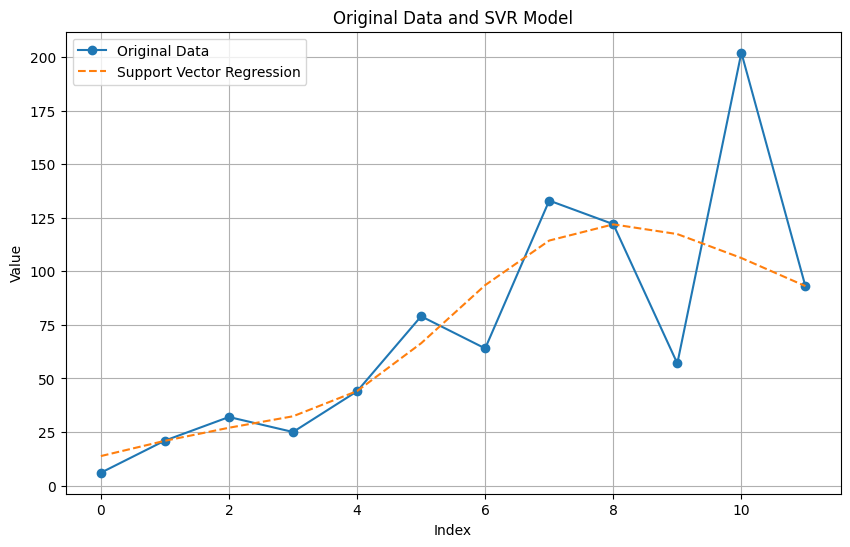

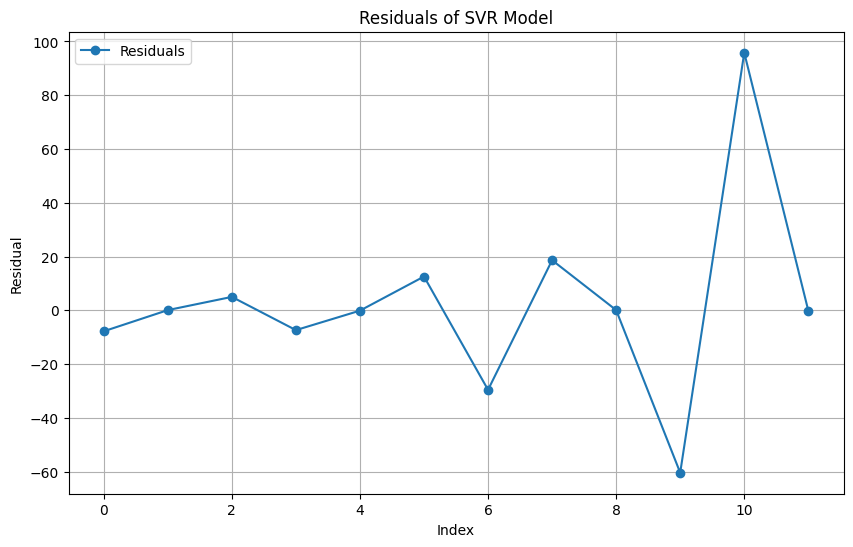

In [29]:
from sklearn.svm import SVR

# SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X, y)

# Predicting and calculating residuals
svr_predicted = svr_model.predict(X)
svr_residuals = y - svr_predicted

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Data', marker='o')
plt.plot(svr_predicted, label='Support Vector Regression', linestyle='--')
plt.title('Original Data and SVR Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(svr_residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of SVR Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 116ms/step


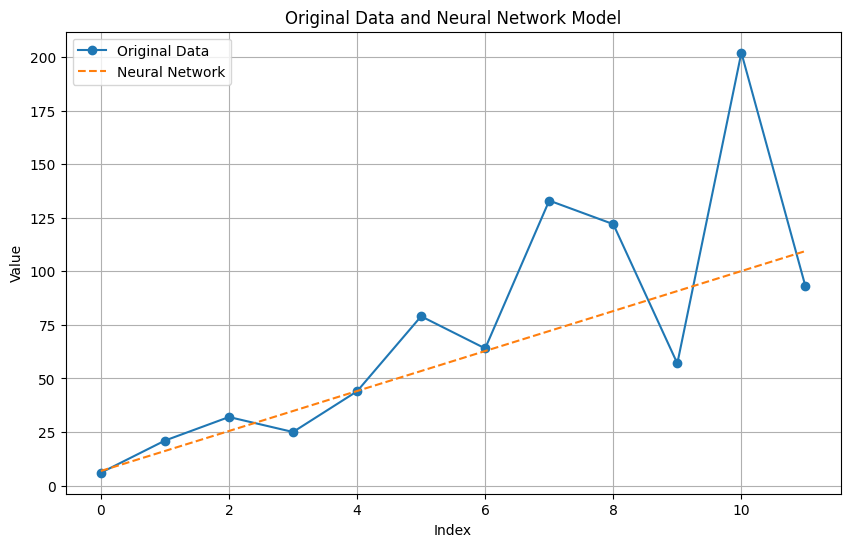

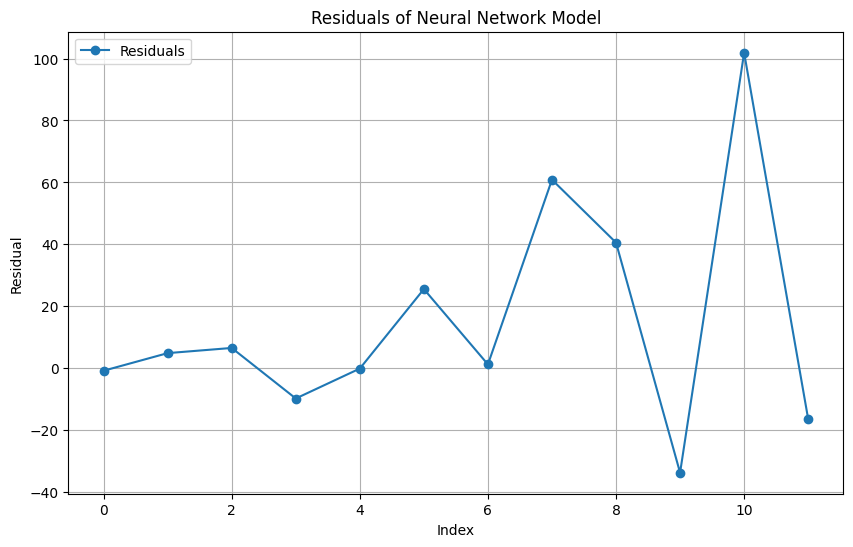

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X, y, epochs=100, batch_size=10, verbose=0)

# Predicting and calculating residuals
nn_predicted = nn_model.predict(X).flatten()
nn_residuals = y - nn_predicted

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Data', marker='o')
plt.plot(nn_predicted, label='Neural Network', linestyle='--')
plt.title('Original Data and Neural Network Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(nn_residuals, label='Residuals', marker='o', linestyle='-')
plt.title('Residuals of Neural Network Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()